# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [2]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"

#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alumno\AppData\Local\Temp\ipykernel_11444\2913829230.py:8: SyntaxWarning: invalid escape sequence '\m'
  LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"


In [5]:
def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [10]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
df1 = extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df2 = extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)

In [11]:
#Filtrar los datos 
df1 = df1.filter(items=["median_salary","area","date"])

In [12]:
#Fusionar los dos dataframe
data = pd.merge(df2,df1)
data.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [13]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               903 non-null    object 
 1   area               903 non-null    object 
 2   date               903 non-null    object 
 3   median_salary      881 non-null    float64
 4   life_satisfaction  320 non-null    float64
 5   mean_salary        903 non-null    object 
 6   recycling_pct      820 non-null    object 
 7   population_size    860 non-null    float64
 8   number_of_jobs     779 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       903 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 84.8+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [14]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

area
city of london            21
barking and dagenham      21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
greenwich                 21
hackney                   21
hammersmith and fulham    21
haringey                  21
harrow                    21
havering                  21
hillingdon                21
hounslow                  21
islington                 21
kensington and chelsea    21
kingston upon thames      21
lambeth                   21
lewisham                  21
merton                    21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
westminster               21
north east                21
north wes

In [15]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
count,881.00,320.00,860.00,779.00,666.00,666.00,903.00
mean,"28,789.28",7.47,"2,542,412.43","1,318,030.81","372,490.27","881,468.15",0.77
std,"6,508.32",0.20,"8,007,687.76","4,283,011.30","2,157,060.24","3,690,376.14",0.42
min,"15,684.00",7.00,"6,581.00","47,000.00",315.00,"5,009.00",0.00
25%,"24,582.00",7.34,"215,899.75","87,000.00","2,960.00","87,635.50",1.00
50%,"28,284.00",7.49,"268,889.50","137,000.00","4,323.00","102,402.00",1.00
75%,"31,589.00",7.61,"359,452.25","338,000.00","8,220.00","126,276.00",1.00
max,"61,636.00",7.96,"55,977,178.00","30,493,000.00","13,303,728.00","24,172,166.00",1.00


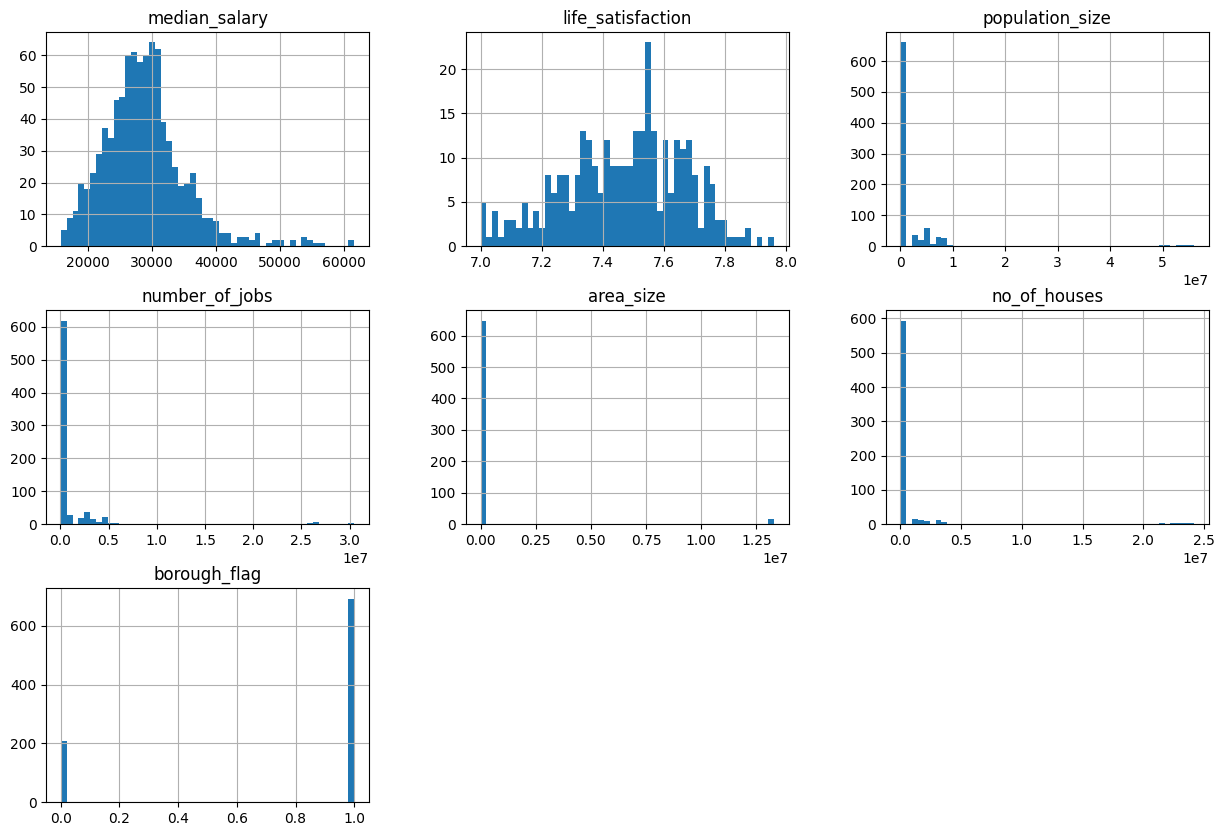

In [16]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
%matplotlib inline
data.hist(bins=50,figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [17]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [18]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent, set_prueba = train_test_split(data, test_size=0.3, random_state=45)

In [19]:
#confirmamos la división
print(len(set_ent),len(set_prueba))

632 271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<Axes: >

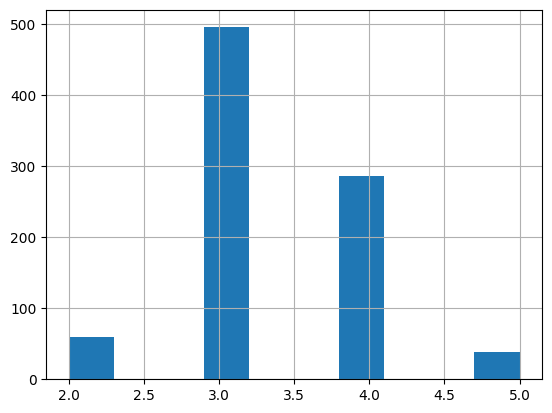

In [20]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"] = pd.cut(data["median_salary"],
            	bins=[0., 10000, 20000, 30000, 40000,
                                np.inf],
                       	labels=[1, 2, 3, 4, 5])                         
#Hacer un histograma de las categorías
data["salary_cat"].hist()

In [21]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

<Axes: >

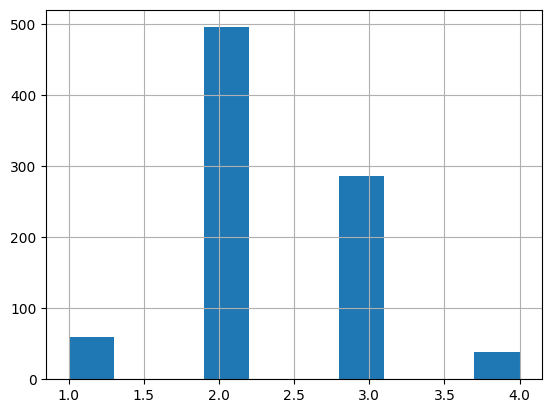

In [22]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=['median_salary'])
data = data.reset_index()
data["salary_cat"] = pd.cut(data["median_salary"],
                           bins=[10000., 20000., 30000., 40000.,
                                np.inf],
                           labels=[1, 2, 3, 4])
data["salary_cat"].hist()

In [24]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts()

salary_cat
2    496
3    287
1     59
4     39
Name: count, dtype: int64

In [25]:
## Dividir datos basándonos en nuestras categorías de salarios
from sklearn.model_selection import StratifiedShuffleSplit


In [27]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=45)

In [29]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data,data["salary_cat"]):
    cat_set_ent = data.loc[ent_index]
    cat_set_prueba = data.loc[prueba_index]

In [30]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts() / len(cat_set_prueba)

salary_cat
2   0.56
3   0.32
1   0.07
4   0.05
Name: count, dtype: float64

***

In [33]:
print("Dataframe de entrenamiento:")
print(cat_set_ent.head()) 

print("Distribución de categorías en el conjunto de entrenamiento:")
print(cat_set_ent["salary_cat"].value_counts())

Dataframe de entrenamiento:
     index       code                    area        date  median_salary  \
323    336  E12000004           east midlands  2006-12-01      21,946.00   
424    438  E09000009                  ealing  2009-12-01      28,234.00   
560    574  E09000016                havering  2012-12-01      28,326.00   
481    495  E09000023                lewisham  2010-12-01      30,806.00   
53      55  E09000013  hammersmith and fulham  2000-12-01      25,264.00   

     life_satisfaction mean_salary recycling_pct  population_size  \
323                NaN       25731            36     4,366,676.00   
424                NaN       34873            38       329,966.00   
560               7.36       31759            35       239,733.00   
481                NaN       32007            18       272,525.00   
53                 NaN       28742             8       164,393.00   

     number_of_jobs  area_size  no_of_houses  borough_flag salary_cat  
323    2,132,000.00        N

***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [22]:
#Importar geopandas


#Leer el mapa


In [23]:
# Graficamos el mapa


***

In [24]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 



#Seleccionar columnas necesarias


***

In [25]:
# Seleccionar datos de nuestro set de entrenamiento


# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice


In [26]:
# Combinar dtaframes


***

In [27]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 


💸: Recuerden que los precios son mayores en el centro de la cuidad

In [28]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)


**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

***

## <span style="color:green">5. Medir la Correlación </span>


In [29]:
# Crear matriz de correlación


# Comparar correlación


In [30]:
#Importar seaborn 


# Crear vector


# Graficar


In [31]:
#Importar pandas 


#Para graficar scatter_matrix...


In [32]:
#Por si quieren ver una gráfica en específico más a detalle


***

## <span style="color:green">6. Combinación de Variables </span>


In [33]:
#Armar una columna para hacer las combinaciones que necesitamos

# Crear matriz de correlación


***

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [34]:
# Crear Dataframe de predictores y variable a predecir ✂️

#Nuevo dataframe sin average_price


***

In [35]:
#Darte una idea de a qué variables le hace faltan datos

#Calcular la suma de todos los vacíos  


In [36]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 


In [37]:
#Tomamos la media 

#Llenamos los valores con la media

#Verifica que no hay datos vacíos


***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

In [38]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer


# 2. Crear objeto, en este caso se llamará imputer



# data numérico


#Ejecuta Imputer


#Aplicar transform para rellenar las medianas 


#Regresarlo a dataframe 


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [39]:
#definir que variable vamos a cambiar a valor numérico

#Convertir variables de texto en numéricas

#verificar que si se haya transformado


#Por si quieres ver como funciona el encoder


In [40]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder

#Crear objeto

#Ajustar

#obligar a que nos muestre la matriz 


***

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [41]:
#Importar MinMaxScaler

#Creamos el objeto 

#Hacer un dataframe con la transformación


#### <span style="color:Blue">9.2 Estandarización </span>

In [42]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 

#Crea objeto

#Hacer un dataframe con la transformación


***

## <span style="color:Blue">10. Pipeline </span>


In [43]:
# Crear función de pipeline


In [44]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)

#Hacer un datframe que usaremos para la regresión linea

#Visualiza los datos 


***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [45]:
## Hacer Regresión Lineal (AL FIN)


In [46]:
#Análisis preambultario de los errores


***

#### <span style="color:purple">11.1 RMSE </span>

In [47]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE


In [48]:
#Sacar el promedio 


In [49]:
#Calcular el porcentaje de acierto


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [50]:
# importar DecisionTreeRegressor

#crear objeto 

#correrlo


#calcular el error


***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [51]:
#Importar cross_val_score, creo objeto, corro mi función


In [52]:
#Calcular el porcentaje de acierto de validación cruzada 


***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [53]:
#Importar RandomForestRegressor, creo objeto, corro mi función


#calcular el error


In [54]:
#Calcular el el promedio de la suma de los errores al cuadrado


In [55]:
#Calcular el porcentaje de acierto de bosque aleatorio


***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [56]:
#Importar GridSearchCV


### <span style="color:purple">12.2 set de prueba</span>

In [57]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 


#Aquí definimos cuál será nuestra variable a predecir y las predichas 



#Ahora, sí. El pipeline para limpieza de datos 



#Por último, ver el error del modelo 


In [58]:
#Ver el porcentaje de acierto
